In [1]:
from jax_circuits import *
from qiskit import transpile

# 2q

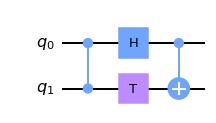

In [3]:
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.h(0)
qc.t(1)
qc.cx(0,1)
u_target = Operator(qc.reverse_bits()).data
qc.draw(output='mpl')

In [4]:
eps = 1e-6
anz = Ansatz(2, 'cz', fill_layers(sequ_layer(2), 2))
loss_f = lambda angs: disc2(anz.unitary(angs), u_target)
reg_f = lambda angs: eps*(jnp.abs(angs)).sum()
res = mynimize_repeated(
    loss_f, anz.num_angles, learning_rate=0.01, regularization_func=reg_f)

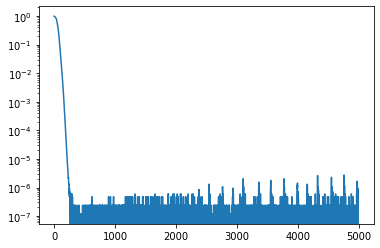

In [5]:
plt.plot(res['loss'])
plt.yscale('log')

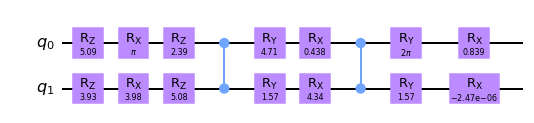

In [6]:
res_circ = anz.circuit(res['params'][-1])
res_circ.draw(output='mpl')

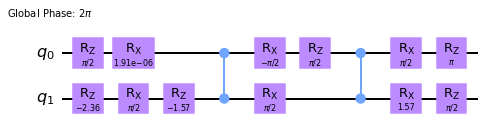

In [7]:
res_circ_trans = transpile(res_circ, basis_gates=['cz', 'rz', 'rx'], optimization_level=3)
res_circ_trans.draw(output='mpl')

# Toffoli 3

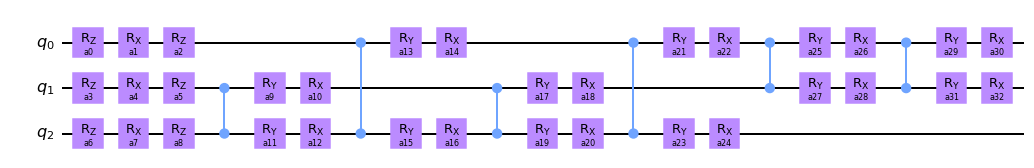

In [10]:
placements_toff3 = [[1, 2], [0, 2], [1, 2], [0, 2], [0, 1], [0, 1]]
anz = Ansatz(3, 'cz', placements={'free': placements_toff3})

anz.circuit().draw(output='mpl')

In [11]:
eps = 1e-5
loss_f = lambda angs: disc2(anz.unitary(angs), u_toff3)
penatly_f = lambda angs: eps*(jnp.abs(angs)).sum()

res = mynimize_repeated(
    loss_f, 
    anz.num_angles, 
    regularization_func=penatly_f, 
    num_repeats=10)

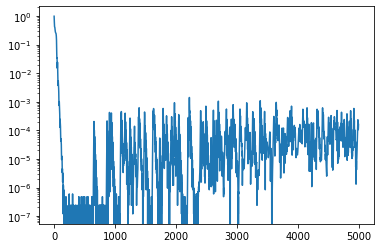

In [22]:
plt.plot(r['loss'])
plt.yscale('log')

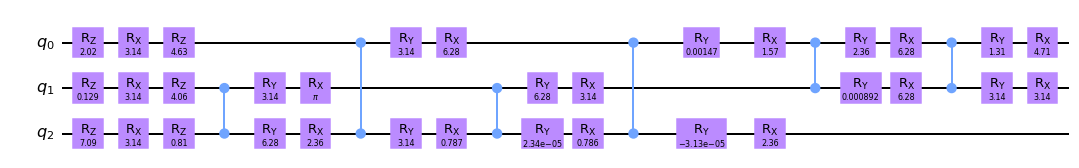

In [26]:
r = res[6]
best_i = jnp.argmin(r['regloss'])
best_angs = r['params'][best_i]
res_circ = anz.circuit(best_angs)
res_circ.draw(output='mpl')

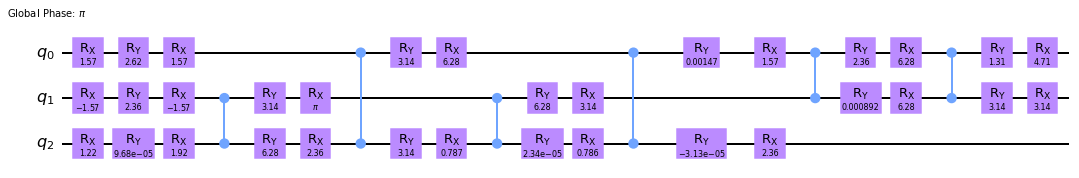

In [33]:
res_circ_trans = transpile(res_circ, basis_gates=['cz', 'rx', 'ry'], optimization_level=3)
res_circ_trans.draw(output='mpl')

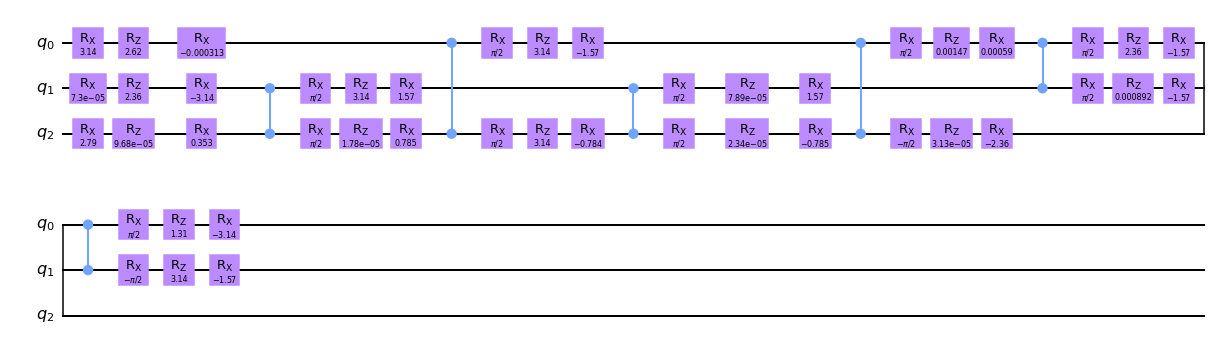

In [38]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Optimize1qGatesSimpleCommutation

pass_ = Optimize1qGatesSimpleCommutation(['cz', 'rx', 'rz'], True)
pm = PassManager(pass_)
new_circ = pm.run(res_circ_trans)
new_circ.draw(output='mpl')